# Beer Recommender written by Ki Young Han

## Problem 1

### Rank top 3 Breweries which produce the strongest beers?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor 
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import seaborn as sns

In [13]:
beer_df = pd.read_csv('BeerDataScienceProject.csv', encoding = 'ISO-8859-1') #import beer review data
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


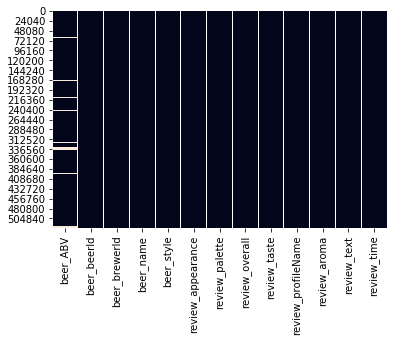

In [14]:
sns.heatmap(beer_df.isnull(), cbar=False) #check for missing value

In [15]:
beer_df_null = beer_df[beer_df.beer_ABV.isnull()]
len(beer_df_null) #there are 20280 missing values in beer_ABV

20280

In [16]:
beer_df = beer_df.fillna(0) #fill missing value by 0  

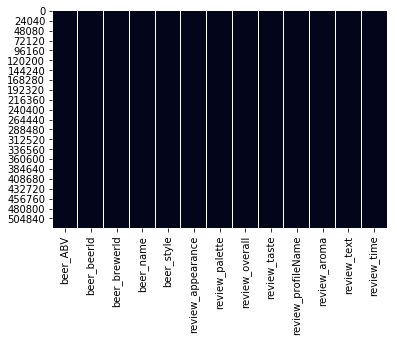

In [17]:
sns.heatmap(beer_df.isnull(), cbar=False) # no more missing value can be seen in this plot

In [8]:
beer_df.describe(include='all')

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
count,528870.000000,528870.000000,528870.000000,528870,528870,528870.000000,528870.000000,528870.000000,528870.000000,528870,528870.000000,528870.0,5.288700e+05
unique,NaN,NaN,NaN,18339,104,NaN,NaN,NaN,NaN,22801,NaN,528372.0,NaN
top,NaN,NaN,NaN,Sierra Nevada Celebration Ale,American IPA,NaN,NaN,NaN,NaN,northyorksammy,NaN,0.0,NaN
freq,NaN,NaN,NaN,3000,43369,NaN,NaN,NaN,NaN,1858,NaN,119.0,NaN
mean,6.748351,22098.466016,2598.423429,NaN,NaN,3.864522,3.758926,3.833197,3.765993,NaN,3.817350,NaN,1.224885e+09
std,2.547394,22158.284352,5281.805350,NaN,NaN,0.604010,0.685335,0.709962,0.669018,NaN,0.718903,NaN,7.605600e+07
min,0.000000,3.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,NaN,8.843904e+08
25%,5.200000,1745.000000,132.000000,NaN,NaN,3.500000,3.500000,3.500000,3.500000,NaN,3.500000,NaN,1.174613e+09
50%,6.300000,14368.000000,394.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,NaN,1.240366e+09
75%,8.500000,40528.000000,1475.000000,NaN,NaN,4.000000,4.000000,4.500000,4.000000,NaN,4.500000,NaN,1.288560e+09


In [9]:
beer_df.sort_values(by=['beer_ABV'], ascending=False)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12913,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,4.5,4.5,4.0,4.0,kappldav123,4.5,The new world strongest beer - I thing it will...,1264684153
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12912,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,thepeter,3.5,Very lucky to get a 2oz sample of this at a ta...,1274645294
12888,30.86,51466,6513,Schorschbräu Schorschbock 31%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,Bottle @ home (of course not the whole bottle ...,1248785936
293929,27.00,25759,35,Samuel Adams Utopias,American Strong Ale,5.0,4.0,4.0,4.5,hero27,4.5,Limited 2005 Edition. Bottle #00732. 24oz. Bea...,1133738662
293930,27.00,25759,35,Samuel Adams Utopias,American Strong Ale,5.0,4.5,3.5,4.0,khoff82,4.0,My girlfriends housesitting fro some rich folk...,1132805435
293924,27.00,25759,35,Samuel Adams Utopias,American Strong Ale,4.0,4.0,3.5,3.5,Oxymoron,3.5,I went to a Big Beers Barelywine and Belgium f...,1137132169


In [10]:
#Group data frame by Beer brewer ID then sort value by beer ABV and Beer brewer ID in descending order to see top 3 breweries which produce the strongest beers.  
beer_df.sort_values(['beer_ABV','beer_brewerId'],ascending=False).groupby('beer_brewerId').head(1) 

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.7,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
293656,27.0,25759,35,Samuel Adams Utopias,American Strong Ale,5.0,4.0,4.5,5.0,wesleyhighley,4.0,"I bought this bottle in 2007, drank it for the...",1293667236
58570,19.5,74295,16866,Grey Monday,American Double / Imperial Stout,4.0,5.0,4.5,4.5,Hands22,5.0,Served from a cask in 6oz pours at Beachwood B...,1318997327
100013,19.5,58656,2958,Cuvée Alex Le Rouge Eisbock,Eisbock,3.0,3.5,3.0,3.0,Anthony1,3.0,The Eisbock of Cuve Alex Le Rouge. Was very ex...,1274797770
259810,19.2,65892,18796,Acero,American Strong Ale,4.0,4.5,4.5,4.0,kwjd,4.0,Bought this almost a year ago at Peluso in Mon...,1296780279
128974,18.4,32963,848,XXX Warlock Double Imperial Stout,American Double / Imperial Stout,1.0,4.0,2.0,1.0,Jeffo,2.5,Got this one from Doodler. Thanks for hanging ...,1309699442
245564,18.0,75962,24803,Mystic Entropy,American Barleywine,4.0,4.0,4.0,3.5,johnnnniee,4.5,I got the opportunity to try this at the brewe...,1322959963
435857,18.0,48365,4614,Anisocoria,American Barleywine,4.0,4.0,4.0,4.0,neobob187,4.5,"Served from a vintage 2008 bottle, stamped Apr...",1309632855
234981,18.0,9966,1628,Double Ice Bock,Eisbock,3.5,4.0,3.5,3.5,maximum12,3.5,"Thanks to Torgo for bringing this rare, cute l...",1324707453
527823,18.0,65454,351,Barleywine,American Barleywine,3.5,3.5,4.0,4.0,pixieskid,4.0,"Hard to believe the said abv, but I double che...",1295490220


## Output:
Computed average Alcohol by volume (ABV) by each Brewery id, and sorted by the top 3 Breweries that has highest abv scores. According to the last output, brewerID 6513 makes the strongest beer which is Schorschbräu Schorschbock 57% with beer ABV of 57.7. Then brewerID 35 makes Samuel Adams Utopias with ABV of 27. And lastly, brewery 16866 makes Grey Monday with ABV of 19.5.

# Problem 2

### Which year did beers enjoy the highest ratings? 

In [25]:
import time
from datetime import datetime # import time, datetime

In [26]:
beer_df['new_time'] = pd.to_datetime(beer_df['review_time'], unit='s') #convert into readable datetime format
beer_df.head() 

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,new_time,time_in_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 18:53:26,2010


In [27]:
beer_df['time_in_year'] = [d.year for d in beer_df['new_time']] #create new column with only year
beer_df.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,new_time,time_in_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 18:53:26,2010


In [28]:
#mean of aggragated data by each year are computed then sorted by highest review_overall 
beer_df.groupby('time_in_year').agg('mean').sort_values('review_overall', ascending=False).head(3) 

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
time_in_year,,,,,,,,,
2000,5.359091,674.303030,1122.272727,3.909091,3.939394,4.181818,3.984848,4.196970,9.708820e+08
1999,2.736000,872.040000,419.360000,3.620000,3.760000,4.000000,3.820000,3.960000,9.244454e+08
2001,5.385615,2460.234219,420.167774,3.879568,3.699336,3.927741,3.768272,3.922757,1.001629e+09


In [29]:
beer_df_review_overall = beer_df.groupby('time_in_year').agg('mean') #mean of aggragated data by each year are computed

Text(0.5, 1.0, 'Average overall review at specific year')

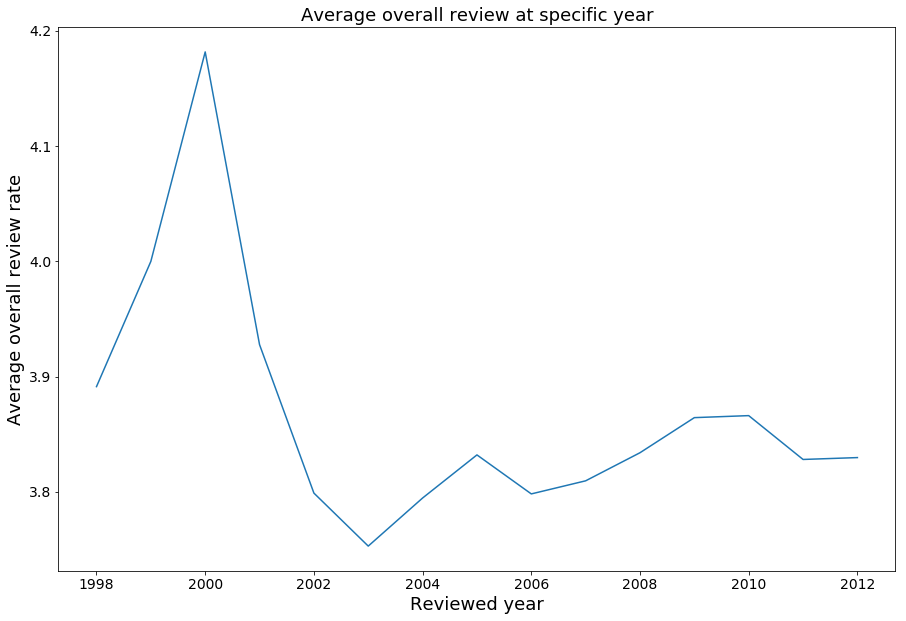

In [30]:
#Create plot to visualize average overall review at each year
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(beer_df_review_overall['review_overall'])
plt.xlabel('Reviewed year', fontsize=18)
plt.ylabel('Average overall review rate', fontsize=18)
plt.title('Average overall review at specific year', fontsize=18)

## Output:
By looking at the average overall review by year frame, it looks like peak year was the year 2,000 with highest rating over 4.15

# Problem 3
### Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

## Approach:
1. Conduct correlation analysis to look at the association between target (review_overall) vs. response features (review_appearane, review_palette, review_taste, review_aroma)
2. Run four different machine learning models to pick best model with highest accuracy then use feature_importance_ to rank the features)

Feature importance can sometimes directly be obtained from the training the models.
Reason for selecting these ML models: 
These are the famous ensemble models in the data science community,
By trainbing the data using these regressor, Root Mean Square Error (RMSE) will be computed. RMSE can help to understand how the residuals are spread out. 


In [31]:
list(beer_df)

['beer_ABV',
 'beer_beerId',
 'beer_brewerId',
 'beer_name',
 'beer_style',
 'review_appearance',
 'review_palette',
 'review_overall',
 'review_taste',
 'review_profileName',
 'review_aroma',
 'review_text',
 'review_time',
 'new_time',
 'time_in_year']

In [33]:
#Create new data frame only contains 'review_overall','review_appearance', 'review_palette', 'review_taste', 'review_aroma' for ML
beer_df_new = beer_df[['review_overall','review_appearance', 'review_palette', 'review_taste', 'review_aroma']].copy()

In [34]:
beer_df_new.head(3)

,review_overall,review_appearance,review_palette,review_taste,review_aroma
0,1.5,2.5,2.0,1.5,1.5
1,3.0,3.0,2.5,3.0,3.0
2,3.0,3.0,2.5,3.0,3.0


In [35]:
beer_df_new.corr() #create correaltion matrix to see correlation between review_overall and other variables.

,review_overall,review_appearance,review_palette,review_taste,review_aroma
review_overall,1.000000,0.486687,0.601971,0.692454,0.783002
review_appearance,0.486687,1.000000,0.547691,0.554775,0.534244
review_palette,0.601971,0.547691,1.000000,0.604271,0.706156
review_taste,0.692454,0.554775,0.604271,1.000000,0.725273
review_aroma,0.783002,0.534244,0.706156,0.725273,1.000000


## Output: 
Correlation Coefficient values represent if the value closer to -1 or 1, this can interpret as target and response variables are strongly negatively correlated and strongly positively correlated respectively. In this example, the highest correlation appears to be review_aroma with review_overall, 0.78.

In [36]:
#Create two dataframe for dependent variable and indepdent variables.
df_X = beer_df_new.iloc[:, 1:5]
df_Y = beer_df_new.iloc[:,0]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3) #do train and test split

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [40]:
# Create ML model list
ML_models = []
ML_models.append(('DT', DecisionTreeRegressor()))
ML_models.append(('AB', AdaBoostRegressor()))
ML_models.append(('RF', RandomForestRegressor()))
ML_models.append(('XG', xgb.XGBRegressor()))

In [41]:
ML_models

[('DT',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')),
 ('AB',
  AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
           n_estimators=50, random_state=None)),
 ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0, warm_start=False)),
 ('XG', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, 

In [42]:
# This function will run 4 ML algorithm to compare the performance as well as feature importance from each ML algorithms
results = []
names = []
scoring = 'neg_mean_squared_error'
print("ML model:  RMSE")
print("Feature Importance: ", list(x_train))
for name, model in ML_models:
    kfold = model_selection.KFold(n_splits=5, random_state= 0)
    model.fit(x_train, y_train)
    importances = model.feature_importances_
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%8s:  %f" % (name, sqrt(-(sum(cv_results)/len(cv_results))))
    print(msg)
    print("Feature Importance: ", importances)

ML model:  RMSE
Feature Importance:  ['review_appearance', 'review_palette', 'review_taste', 'review_aroma']
      DT:  0.421335
Feature Importance:  [0.00882589 0.007603   0.05557534 0.92799578]
      AB:  0.456300
Feature Importance:  [0.083229   0.03308028 0.24770952 0.6359812 ]


C:\Users\kyhan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


      RF:  0.419839
Feature Importance:  [0.01109829 0.01001108 0.05616641 0.92272422]
[22:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kyhan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kyhan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kyhan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kyhan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kyhan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
      XG:  0.416257
Feature Importance:  [0.00808354 0.01074523 0.15680887 0.8243624 ]


## Output: 
Except for Adaboost, but All other ML models, Decision Tree, Random Forest and XGboost have RMSE of about 0.42. All MLs' feature importance result shows that review_aroma was the most important factor(feature) for overall reivew rating follow by review_taste, review_appearance and review_palatte, respectively.

# Problem 4

### If you were to recommend 3 to 5 beers to your friends based on this data which ones will you recommend?

In [43]:
list(beer_df)

['beer_ABV',
 'beer_beerId',
 'beer_brewerId',
 'beer_name',
 'beer_style',
 'review_appearance',
 'review_palette',
 'review_overall',
 'review_taste',
 'review_profileName',
 'review_aroma',
 'review_text',
 'review_time',
 'new_time',
 'time_in_year']

In [44]:
#First I have filtered the beers with rate 5 on taste, aroma, appearance, palette and overall
five_star_beer_df = beer_df[(beer_df.review_overall == 5) & (beer_df.review_appearance == 5) & (beer_df.review_palette == 5) & (beer_df.review_taste == 5) & (beer_df.review_aroma == 5)]

In [45]:
five_star_beer_df.describe(include='all')

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,new_time,time_in_year
count,2010.000000,2010.000000,2010.000000,2010,2010,2010.0,2010.0,2010.0,2010.0,2010,2010.0,2010,2.010000e+03,2010,2010.000000
unique,NaN,NaN,NaN,590,90,NaN,NaN,NaN,NaN,1458,NaN,2006,NaN,2010,NaN
top,NaN,NaN,NaN,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,NaN,NaN,NaN,NaN,putnam,NaN,#NAME?,NaN,2002-04-08 16:51:53,NaN
freq,NaN,NaN,NaN,112,428,NaN,NaN,NaN,NaN,17,NaN,3,NaN,1,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-31 17:49:26,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-10 00:25:54,NaN
mean,8.266915,18598.270149,2490.792040,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,NaN,1.222978e+09,NaN,2008.235323
std,3.277519,20620.573354,5425.331354,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,8.579122e+07,NaN,2.727338
min,0.000000,30.000000,1.000000,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,NaN,9.730146e+08,NaN,2000.000000
25%,6.000000,1503.250000,140.000000,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,NaN,1.174622e+09,NaN,2007.000000


In [46]:
list(five_star_beer_df.beer_style.unique())

['American IPA',
 'English Bitter',
 'American Pale Ale (APA)',
 'Scottish Ale',
 'American Blonde Ale',
 'American Double / Imperial IPA',
 'Russian Imperial Stout',
 'Black & Tan',
 'American Double / Imperial Stout',
 'American Amber / Red Ale',
 'American Porter',
 'English Porter',
 'English Strong Ale',
 'Irish Dry Stout',
 'Scotch Ale / Wee Heavy',
 'Belgian IPA',
 'Belgian Strong Pale Ale',
 'American Barleywine',
 'Fruit / Vegetable Beer',
 'Rye Beer',
 'American Black Ale',
 'Wheatwine',
 'Baltic Porter',
 'Doppelbock',
 'Munich Dunkel Lager',
 'Rauchbier',
 'Czech Pilsener',
 'American Pale Wheat Ale',
 'Munich Helles Lager',
 'English Barleywine',
 'Tripel',
 'Euro Dark Lager',
 'Saison / Farmhouse Ale',
 'Old Ale',
 'American Wild Ale',
 'Berliner Weissbier',
 'Extra Special / Strong Bitter (ESB)',
 'Hefeweizen',
 'Maibock / Helles Bock',
 'American Stout',
 'American Brown Ale',
 'American Strong Ale',
 'Dubbel',
 'Bière de Garde',
 'Milk / Sweet Stout',
 'American Amber 

In [47]:
#First I have filtered the beers with rate 5 on taste, aroma, appearance, palette and overall
five_star_beer_df = beer_df[(beer_df.review_overall == 5) & (beer_df.review_appearance == 5) & (beer_df.review_palette == 5) & (beer_df.review_taste == 5) & (beer_df.review_aroma == 5)]

#I create recommandation function which take two input of desired beer ABV and desired beer style then it will recommand 5 beers with most similar ABV of desired beer style of their choice.
def beer_recommand(ABV, desired_beer_style):
    
    min_ABV = min(five_star_beer_df['beer_ABV'])
    max_ABV = max(five_star_beer_df['beer_ABV'])
    try:
        if ABV is '' and desired_beer_style == 'beer_styles':
            print("Select your prefered beer style from following list:")
            print(list(five_star_beer_df.beer_style.unique()))
        elif ABV >= max_ABV and ABV >= min_ABV:
            print("Please type desired ABV in between ", min_ABV, " and ", max_ABV)
        elif desired_beer_style not in list(five_star_beer_df.beer_style.unique()):
            print("Please type correct beer style. Please type '' for ABV, and 'beer_styles' to see detail list of beer styles.")
        
        else:
            selected_beer_style_df = five_star_beer_df[(five_star_beer_df.beer_style == desired_beer_style)]

            uniquely_selected_beer_style_df = selected_beer_style_df.drop_duplicates(subset=['beer_beerId'])

            recommanded_bear_sorted = uniquely_selected_beer_style_df.iloc[(uniquely_selected_beer_style_df['beer_ABV'] - ABV).abs().argsort()[:5]]
            
            print("I would recommand following 5 beers based on what you typed: ", list(recommanded_bear_sorted['beer_name']))

    except TypeError:
        print("Please type desired ABV in between ", min_ABV, " and ", max_ABV)
        print("Please type correct beer style. Please type '' for ABV, and 'beer_styles' to see detail list of beer style.")

In [48]:
# Message will prompt for Type error when both input ABV and beer_style are not correlct value 
beer_recommand('asdf','asdf')

Please type desired ABV in between  0.0  and  27.0
Please type correct beer style. Please type '' for ABV, and 'beer_styles' to see detail list of beer style.


In [32]:
# Following message will be displayed if you input correct ABV but incorrect beer style
beer_recommand(10,'hello')

Please type correct beer style. Please type '' for ABV, and 'beer_styles' to see detail list of beer styles.


In [33]:
#This will let you see list of beer styles
beer_recommand('','beer_styles')

Select your prefered beer style from following list:
['American IPA', 'English Bitter', 'American Pale Ale (APA)', 'Scottish Ale', 'American Blonde Ale', 'American Double / Imperial IPA', 'Russian Imperial Stout', 'Black & Tan', 'American Double / Imperial Stout', 'American Amber / Red Ale', 'American Porter', 'English Porter', 'English Strong Ale', 'Irish Dry Stout', 'Scotch Ale / Wee Heavy', 'Belgian IPA', 'Belgian Strong Pale Ale', 'American Barleywine', 'Fruit / Vegetable Beer', 'Rye Beer', 'American Black Ale', 'Wheatwine', 'Baltic Porter', 'Doppelbock', 'Munich Dunkel Lager', 'Rauchbier', 'Czech Pilsener', 'American Pale Wheat Ale', 'Munich Helles Lager', 'English Barleywine', 'Tripel', 'Euro Dark Lager', 'Saison / Farmhouse Ale', 'Old Ale', 'American Wild Ale', 'Berliner Weissbier', 'Extra Special / Strong Bitter (ESB)', 'Hefeweizen', 'Maibock / Helles Bock', 'American Stout', 'American Brown Ale', 'American Strong Ale', 'Dubbel', 'Bière de Garde', 'Milk / Sweet Stout', 'America

In [34]:
#Finally you get following return by entering correct inputs
beer_recommand(10,'American IPA')

I would recommand following 5 beers based on what you typed:  ['DFG IPA', 'Fritzkrieg Hop IPA', 'Jai Alai IPA - Cedar Aged (Humidor Series)', 'Jai Alai IPA', 'Jai Alai IPA - White Oak']


## Output

This recommendation system will take two inputs from the users (desired beer ABV and prefer beer style), then it will return top 5 recommended beers by the closed ABV of user input from choice of beer style made by user. 

The engine uses the sub dataset that is filtered by 5/5 rated on all categories: taste, aroma, appearance, palette and overall

# Problem 5

### Which Beer style seems to be the favorite based on Reviews written by users? How does written review compare to overall review score for the beer style?

In [41]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 15 columns):
beer_ABV              528870 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528870 non-null object
review_aroma          528870 non-null float64
review_text           528870 non-null object
review_time           528870 non-null int64
new_time              528870 non-null datetime64[ns]
time_in_year          528870 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 60.5+ MB


In [42]:
beer_df2=beer_df.copy()
beer_df2.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,new_time,time_in_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,a lot of foam but a lot in the smell some bana...,1234817823,2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,dark red color light beige foam average in the...,1235915097,2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,almost totally black beige foam quite compact ...,1235916604,2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,golden yellow color white compact foam quite c...,1234725145,2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,according to the website the style for the cal...,1293735206,2010-12-30 18:53:26,2010


In [44]:
beer_df2["review_text"]=beer_df2["review_text"].astype(str)
#lower case
beer_df2["review_text"] = beer_df2["review_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
## remove punctuation
beer_df2["review_text"]  = beer_df2["review_text"] .str.replace('[^\w\s]','')

In [45]:
beer_df2["review_text"][1]

'dark red color light beige foam average in the smell malt and caramel not really light again malt and caramel in the taste not bad in the end maybe a note of honey in teh back and a light fruitiness average body in the aftertaste a light bitterness with the malt and red fruit nothing exceptional but not bad drinkable beer'

In [46]:
from textblob import TextBlob

In [47]:
#This will create sentiment scores by user review
beer_df2[['polarity', 'subjectivity']] = beer_df2["review_text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [48]:
beer_df2.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,new_time,time_in_year,polarity,subjectivity
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,a lot of foam but a lot in the smell some bana...,1234817823,2009-02-16 20:57:03,2009,-0.090909,0.406250
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,dark red color light beige foam average in the...,1235915097,2009-03-01 13:44:57,2009,0.147436,0.487179
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,almost totally black beige foam quite compact ...,1235916604,2009-03-01 14:10:04,2009,0.338333,0.693333
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,golden yellow color white compact foam quite c...,1234725145,2009-02-15 19:12:25,2009,0.362745,0.522549
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,according to the website the style for the cal...,1293735206,2010-12-30 18:53:26,2010,0.167143,0.538905


In [49]:
#mean of aggragate dataframe group by beer style are computed and sorted by polarity in descending order to see top rated beer style by user review using sentiment analysis
result=beer_df2.groupby(['beer_style']).mean().reset_index()
result.sort_values(by='polarity', ascending=False)

,beer_style,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,time_in_year,polarity,subjectivity
38,Dortmunder / Export Lager,5.555721,16043.908789,1641.137645,3.877280,3.677446,4.051962,3.859867,3.909895,1.208763e+09,2007.818132,0.232754,0.540691
99,Vienna Lager,4.799210,5494.944890,1485.439141,3.819809,3.580278,3.919614,3.703298,3.771859,1.200559e+09,2007.537644,0.231319,0.544165
36,Czech Pilsener,4.603146,22827.539778,1304.522840,3.693071,3.513174,3.877246,3.668606,3.688195,1.220195e+09,2008.240376,0.209396,0.531897
12,American IPA,6.477021,25566.752542,3105.691854,4.018723,3.912253,3.989785,3.898810,3.950944,1.240887e+09,2008.791233,0.209268,0.532440
90,Rye Beer,6.834186,19533.769454,2117.420931,4.129562,4.037845,4.069994,4.041997,4.142981,1.233852e+09,2008.621355,0.207173,0.539379
82,Märzen / Oktoberfest,5.072486,16393.321306,1711.687536,3.762479,3.536366,3.819738,3.659797,3.694452,1.218596e+09,2007.939532,0.203747,0.537429
81,Munich Helles Lager,4.672734,20451.439753,2589.142636,3.668383,3.545057,3.901390,3.702626,3.721936,1.204736e+09,2007.666838,0.201342,0.522453
65,Hefeweizen,4.977593,21656.065240,2467.609961,3.787735,3.743599,3.896235,3.732258,3.772770,1.212636e+09,2007.917339,0.200734,0.515200
23,Belgian IPA,8.471656,36620.783189,1598.223486,4.045983,3.949444,3.900494,3.915575,3.975155,1.256455e+09,2009.320396,0.198889,0.523014
78,Maibock / Helles Bock,6.522574,22543.376151,952.252467,3.805181,3.634293,3.860773,3.777714,3.802878,1.223287e+09,2008.330757,0.198770,0.532660


In [50]:
#mean of aggragate dataframe group by beer style are computed and sorted by review_overall
result.sort_values(by='review_overall', ascending=False)

,beer_style,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,time_in_year,polarity,subjectivity
63,Gueuze,5.142095,16967.558095,966.024762,4.012381,4.150794,4.140952,4.087302,4.192381,1.241135e+09,2008.813968,0.159855,0.494318
27,Berliner Weissbier,2.974652,46069.200429,9342.624866,3.886388,3.869239,4.133976,3.988746,4.017149,1.269371e+09,2009.688103,0.176371,0.497068
11,American Double / Imperial Stout,10.082811,31729.533613,3295.172433,4.218164,4.236469,4.100518,4.168965,4.263103,1.257203e+09,2009.334932,0.162258,0.535369
83,Oatmeal Stout,5.510971,24586.211066,1092.151718,4.165254,3.949874,4.080768,4.012123,4.096088,1.203338e+09,2007.628886,0.180341,0.542142
41,Eisbock,12.493231,21018.630769,1814.517949,3.971795,4.069231,4.079487,4.117949,4.194872,1.194591e+09,2007.430769,0.156324,0.528594
90,Rye Beer,6.834186,19533.769454,2117.420931,4.129562,4.037845,4.069994,4.041997,4.142981,1.233852e+09,2008.621355,0.207173,0.539379
38,Dortmunder / Export Lager,5.555721,16043.908789,1641.137645,3.877280,3.677446,4.051962,3.859867,3.909895,1.208763e+09,2007.818132,0.232754,0.540691
86,Quadrupel (Quad),10.697254,12891.163762,1163.344548,4.098804,4.150993,4.049250,4.130523,4.214126,1.227279e+09,2008.387313,0.177358,0.534083
88,Roggenbier,5.659477,56201.385621,6509.692810,3.905229,3.905229,4.032680,3.882353,3.973856,1.276830e+09,2009.934641,0.182638,0.523346
74,Lambic - Fruit,5.113628,12819.445860,505.826433,4.096736,4.100849,4.027070,4.028397,4.133625,1.231301e+09,2008.515658,0.165604,0.500042


## Output: 
Using TextBlob for sentiment analysis,
Computed polarity score and subjectivity score. 
Polarity is from [-1.0, 1.0] which means negative sentiment vs. positive sentiment. 
Subjectivity is from [0.0, 1.0] which means very objective vs. subjective. 

Computed polarity score to understand the sentiment by each review then group them by average polarity score for each beer style. The resulting table shows that based on the written review, Dortmunder / Export Lager is the most favorite beer style but based on the overall review score, Gueuze is the favorite style.